In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('/kaggle/input/new-sentiment/My_final_sentiment.csv')

print(df.head())  


       File         AdverseReaction Severity
0  ADCETRIS   Peripheral Neuropathy   Severe
1  ADCETRIS             Anaphylaxis   Severe
2  ADCETRIS      Infusion Reactions   Severe
3  ADCETRIS  Hematologic Toxicities   Severe
4  ADCETRIS              Infections   Severe


In [5]:
# Step 1: Preprocess the text (remove stopwords, lowercase, etc.)

stop_words = set(stopwords.words('english'))

df['AdverseReaction'] = df['AdverseReaction'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))



# Step 2: Encode the labels (Severity) into numerical values

label_encoder = LabelEncoder()

df['Severity_Label'] = label_encoder.fit_transform(df['Severity'])

In [6]:
# Step 3: Split the data into training and test sets

X = df['AdverseReaction']

y = df['Severity_Label']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 4: Vectorize the text using TF-IDF

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Step 5: Train a Logistic Regression model

model = LogisticRegression()

model.fit(X_train_tfidf, y_train)



# Step 6: Evaluate the model

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))



# Step 7: Predict the severity of new reactions

new_reaction = ["Severe headache", "Mild rash"]

new_reaction_tfidf = vectorizer.transform(new_reaction)

predictions = model.predict(new_reaction_tfidf)



# Convert numeric labels back to original severity labels

predicted_severity = label_encoder.inverse_transform(predictions)

print(predicted_severity)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.62      0.37      0.47     50766
           1       0.63      0.88      0.73     88296
           2       0.62      0.25      0.36     25910

    accuracy                           0.63    164972
   macro avg       0.62      0.50      0.52    164972
weighted avg       0.62      0.63      0.59    164972

['Severe' 'Severe']


In [8]:
df_cleaned = df.drop_duplicates(subset=['File', 'AdverseReaction'])

In [9]:
#with both file and advereser reaction 

In [10]:


# Step 2: Combine 'File' and 'AdverseReaction' into a single text column

df_cleaned['Combined_Feature'] = df_cleaned['File'] + " " + df_cleaned['AdverseReaction']



# Step 3: Preprocess the text (remove stopwords, lowercase, etc.)

stop_words = set(stopwords.words('english'))

df_cleaned['Combined_Feature'] = df_cleaned['Combined_Feature'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))


/tmp/ipykernel_30/2605274445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Combined_Feature'] = df_cleaned['File'] + " " + df_cleaned['AdverseReaction']
/tmp/ipykernel_30/2605274445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Combined_Feature'] = df_cleaned['Combined_Feature'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))


In [11]:
# Step 4: Encode the labels (Severity) into numerical values

label_encoder = LabelEncoder()

df_cleaned['Severity_Label'] = label_encoder.fit_transform(df_cleaned['Severity'])



# Step 5: Split the data into training and test sets

X = df_cleaned['Combined_Feature']

y = df_cleaned['Severity_Label']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 6: Vectorize the combined text using TF-IDF

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

/tmp/ipykernel_30/4255771718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Severity_Label'] = label_encoder.fit_transform(df_cleaned['Severity'])


In [12]:
# Step 7: Train a Logistic Regression model

model = LogisticRegression()

model.fit(X_train_tfidf, y_train)



# Step 8: Evaluate the model

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))



# Step 9: Predict the severity of new reactions

new_reaction = ["ADCETRIS Peripheral Neuropathy", "ADCETRIS Mild rash"]

new_reaction_tfidf = vectorizer.transform(new_reaction)

predictions = model.predict(new_reaction_tfidf)



# Convert numeric labels back to original severity labels

predicted_severity = label_encoder.inverse_transform(predictions)

print(predicted_severity)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     11156
           1       0.86      0.90      0.88     21881
           2       0.83      0.77      0.80      7131

    accuracy                           0.85     40168
   macro avg       0.84      0.82      0.83     40168
weighted avg       0.85      0.85      0.85     40168

[nan nan]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print(df_cleaned['Severity'].value_counts())

Severity
Severe      109449
Moderate     55154
Name: count, dtype: int64


In [14]:
!pip install imbalanced-learn


In [15]:
#usiong smote in cure the issue of imbalance 


In [16]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report



# Assuming X_train_tfidf and y_train are already defined



# Apply SMOTE to the training data

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)



# Train the model on the resampled data

model = LogisticRegression(max_iter=1000, class_weight='balanced')  # You can add class_weight if needed

model.fit(X_train_res, y_train_res)



# Evaluate the model on the test set

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.86      0.81     11156
           1       0.93      0.81      0.87     21881
           2       0.74      0.89      0.80      7131

    accuracy                           0.84     40168
   macro avg       0.81      0.85      0.83     40168
weighted avg       0.85      0.84      0.84     40168



In [17]:
#using balanced method

In [18]:
from sklearn.linear_model import LogisticRegression



# Use class weighting to handle the imbalance

model = LogisticRegression(class_weight='balanced')



# Fit the model on the training data

model.fit(X_train_tfidf, y_train)



# Evaluate the model

y_pred = model.predict(X_test_tfidf)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     11156
           1       0.94      0.80      0.86     21881
           2       0.72      0.90      0.80      7131

    accuracy                           0.83     40168
   macro avg       0.81      0.85      0.82     40168
weighted avg       0.85      0.83      0.84     40168



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#ensemble with xgboost and random forest


In [20]:
!pip install xgboost


In [21]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report



# Train a Random Forest model with class weighting

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, max_depth=10)

rf_model.fit(X_train_tfidf, y_train)



# Evaluate the model on the test set

y_pred_rf = rf_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.73      0.31      0.43     11156
           1       0.63      0.89      0.74     21881
           2       0.57      0.38      0.46      7131

    accuracy                           0.64     40168
   macro avg       0.64      0.53      0.54     40168
weighted avg       0.65      0.64      0.60     40168



In [22]:
import xgboost as xgb

from sklearn.metrics import classification_report



# Train an XGBoost model with class weighting

xgb_model = xgb.XGBClassifier(scale_pos_weight=3, random_state=42, n_estimators=100, max_depth=10)

xgb_model.fit(X_train_tfidf, y_train)



# Evaluate the model on the test set

y_pred_xgb = xgb_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_xgb))


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [01:03:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.78      0.86     11156
           1       0.85      0.99      0.91     21881
           2       0.97      0.76      0.85      7131

    accuracy                           0.89     40168
   macro avg       0.93      0.84      0.88     40168
weighted avg       0.90      0.89      0.89     40168



In [24]:
#emsemble learning

In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define the base models
log_reg = LogisticRegression()
xgb = XGBClassifier(eval_metric='mlogloss')

# Define the meta-model (a logistic regression here)
meta_model = LogisticRegression()

# Create StackingClassifier
stacking_clf = StackingClassifier(estimators=[
    ('log_reg', log_reg),
    ('xgb', xgb)
], final_estimator=meta_model)

# Fit the stacking model
stacking_clf.fit(X_train_tfidf, y_train)

# Evaluate the ensemble model
accuracy = stacking_clf.score(X_test_tfidf, y_test)
print(f"Stacked Model Accuracy: {accuracy:.4f}")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacked Model Accuracy: 0.9110


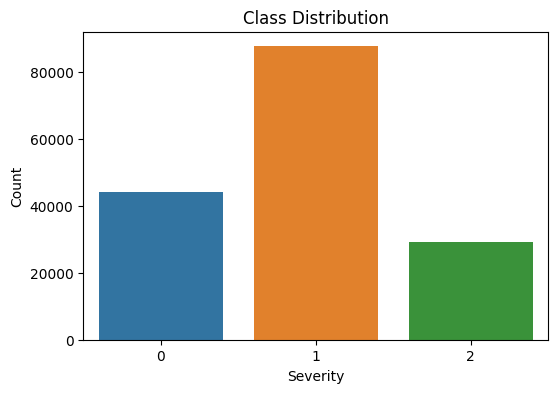

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train contains the target variable (severity classes)
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


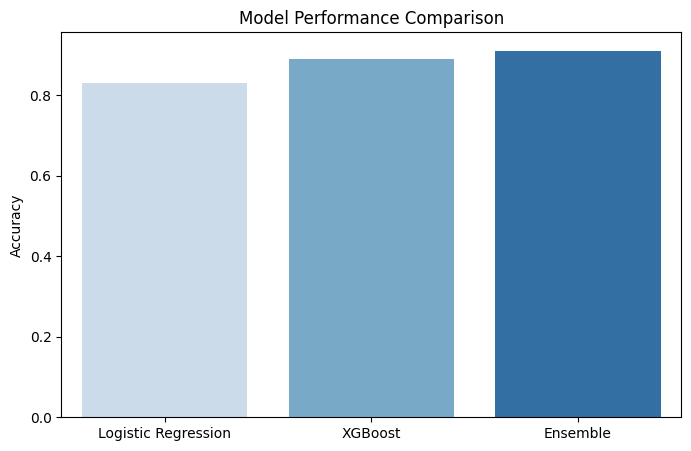

In [36]:
models = ['Logistic Regression', 'XGBoost', 'Ensemble']
accuracies = [0.83, 0.89, 0.911]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='Blues')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


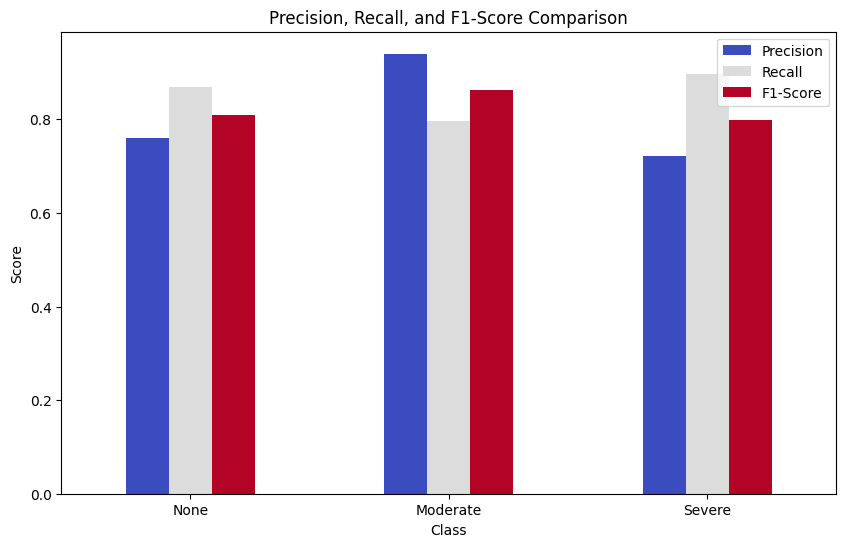

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Create DataFrame for better visualization
metrics = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=['None', 'Moderate', 'Severe'])

metrics.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.show()


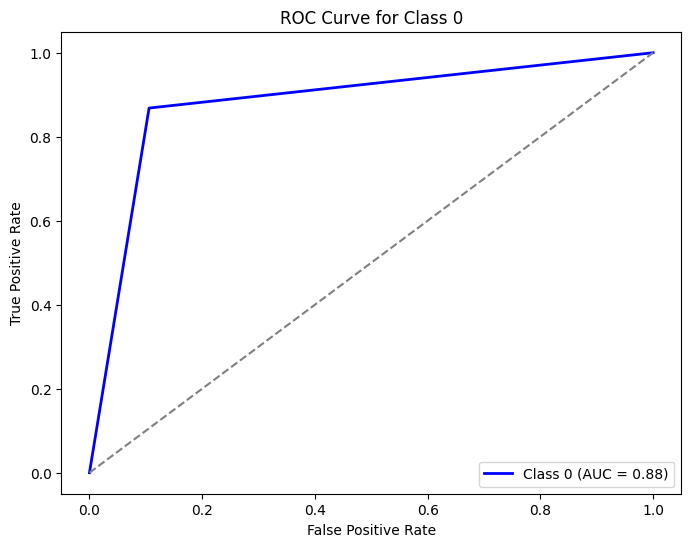

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_pred_bin[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Class 0 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for Class 0')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


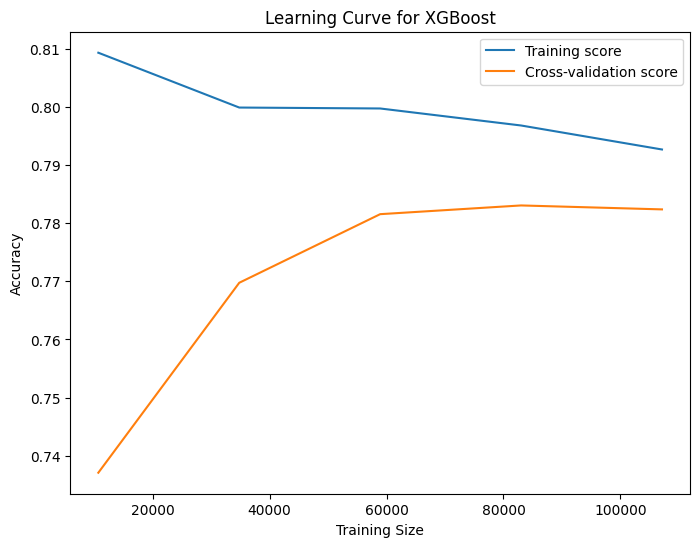

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train_tfidf, y_train, cv=3)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning Curve for XGBoost')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
